#### Bijan
* Clean my histograms, overlay, compare
* Run histograms across x values
* Run histograms across y values
* Compare
* Redo clustering on initial slices to make sure the 4 are different

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
%matplotlib inline
import urllib2
import numpy as np

np.set_printoptions(precision=3, suppress=True)
url = ('https://raw.githubusercontent.com/Upward-Spiral-Science'
       '/data/master/syn-density/output.csv')
data = urllib2.urlopen(url)
csv = np.genfromtxt(data, delimiter=",")[1:]

def check_condition(row):
    if row[3] == 0:
        return False
    return True

a = np.apply_along_axis(check_condition, 1, csv)
a = np.where(a == True)[0]
nonZeroMask = csv[a, :]

synDividedMask = np.divide(nonZeroMask[:,4],nonZeroMask[:,3])
synDividedMask = synDividedMask * (64**3)
accurateDataT = np.vstack((nonZeroMask[:,0],nonZeroMask[:,1],nonZeroMask[:,2],synDividedMask))
accurateData = accurateDataT.T

cleaned = accurateData[accurateData[:,0] >= 409]
cleaned = cleaned[cleaned[:,0] <= 3529]
cleaned = cleaned[cleaned[:,1] >= 1564]
cleaned = cleaned[cleaned[:,1] <= 3124]

length, width = cleaned.shape
print length
print width

36036
4


#### 1) Make histograms proportional for easier comparisons (z-values)

[   55.   166.   277.   388.   499.   610.   721.   832.   943.  1054.
  1165.]


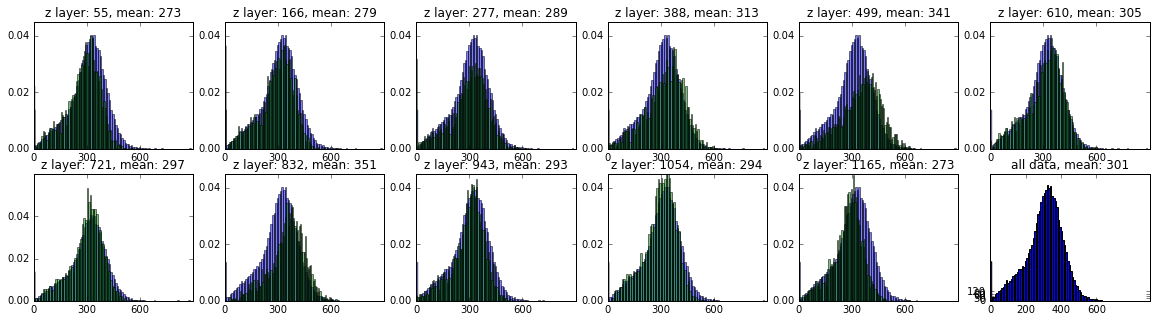

In [70]:
import math
meansxyz = np.ones((11,3))

divisions = np.unique(cleaned[:,2])
print divisions
fig, ax = plt.subplots(2,6,figsize=(20,5))
for d in divisions:
    zval = int((d + 56)/111)
    yind = (zval%6) - 1
    xind = np.floor_divide(zval,7)
    z_layer = cleaned[cleaned[:,2] == d]
    weights = np.ones_like(z_layer[:,3])/len(z_layer[:,3])
    weights2 = np.ones_like(cleaned[:,3])/len(cleaned[:,3])
    ax[xind][yind].hist(cleaned[:,3], bins = 100, alpha = .5, weights = weights2)
    ax[xind][yind].hist(z_layer[:,3], bins = 100, alpha = .5, weights = weights)
    meansxyz[zval-1,2] = int(np.mean(z_layer[:,3]))
    title = 'z layer: ' + str(int(d)) + ', mean: ' + str(int(np.mean(z_layer[:,3])))
    ax[xind][yind].set_title(title)
    ax[xind][yind].set_yticks(np.arange(0,.045,.02))
    ax[xind][yind].set_xticks(np.arange(0,700,300))
    if (d == (11*111) - 56):
        ax[1][5].hist(cleaned[:,3], bins = 100)
        title = 'all data' + ', mean: ' + str(int(np.mean(cleaned[:,3])))
        ax[1][5].set_title(title)
        ax[1][5].set_yticks(np.arange(0,150,30))
        ax[1][5].set_xticks(np.arange(0,700,200))
plt.show()

#### 2)Histograms across binned x-values

[  409.   682.   955.  1228.  1540.  1813.  2086.  2359.  2671.  2944.
  3217.  3529.]


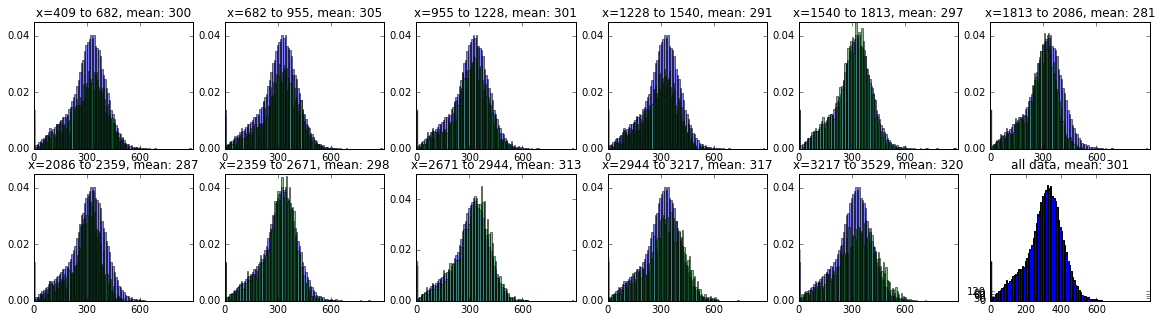

In [72]:
divisions = np.unique(cleaned[:,0])
divisions = divisions[np.linspace(0,divisions.size-1,12,dtype = int)]
print divisions
prev = divisions[0]
divisions = divisions[1:]
fig, ax = plt.subplots(2,6,figsize=(20,5))
counter = 0
for d in divisions:
    counter += 1
    yind = (counter%6) - 1
    xind = np.floor_divide(counter,7)
    z_layer = cleaned[cleaned[:,0] > prev]
    z_layer = z_layer[z_layer[:,0] <= d]
    weights = np.ones_like(z_layer[:,3])/len(z_layer[:,3])
    weights2 = np.ones_like(cleaned[:,3])/len(cleaned[:,3])
    ax[xind][yind].hist(cleaned[:,3], bins = 100, alpha = .5, weights = weights2)
    ax[xind][yind].hist(z_layer[:,3], bins = 100, alpha = .5, weights = weights)
    meansxyz[counter-1,0] = int(np.mean(z_layer[:,3]))
    title = 'x=' + str(int(prev)) + ' to ' + str(int(d)) + ', mean: ' + str(int(np.mean(z_layer[:,3])))
    ax[xind][yind].set_title(title)
    ax[xind][yind].set_yticks(np.arange(0,.045,.02))
    ax[xind][yind].set_xticks(np.arange(0,700,300))
    prev = d
    if (counter == 11):
        ax[1][5].hist(cleaned[:,3], bins = 100)
        title = 'all data' + ', mean: ' + str(int(np.mean(cleaned[:,3])))
        ax[1][5].set_title(title)
        ax[1][5].set_yticks(np.arange(0,150,30))
        ax[1][5].set_xticks(np.arange(0,700,200))
plt.show()

#### 3)Histograms across binned y-values

[ 1564.  1681.  1837.  1954.  2110.  2266.  2383.  2539.  2695.  2812.
  2968.  3124.]


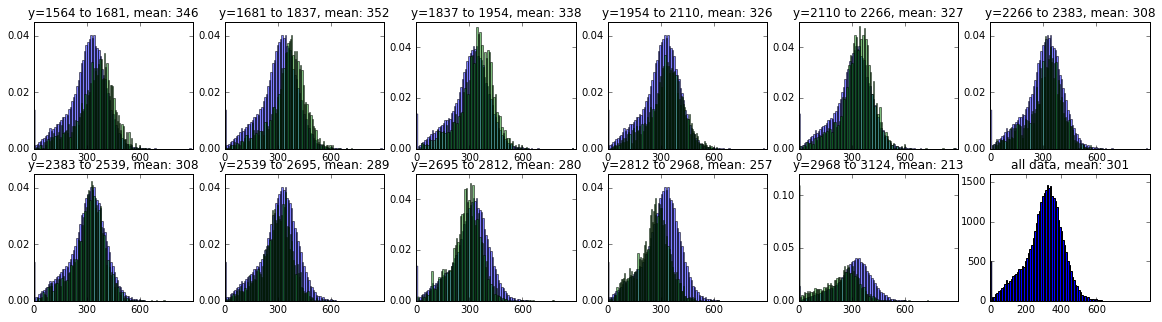

In [73]:
divisions = np.unique(cleaned[:,1])
divisions = divisions[np.linspace(0,divisions.size-1,12,dtype = int)]
print divisions
prev = divisions[0]
divisions = divisions[1:]
fig, ax = plt.subplots(2,6,figsize=(20,5))
counter = 0
for d in divisions:
    counter += 1
    yind = (counter%6) - 1
    xind = np.floor_divide(counter,7)
    z_layer = cleaned[cleaned[:,1] >= prev]
    z_layer = z_layer[z_layer[:,1] < d]
    weights = np.ones_like(z_layer[:,3])/len(z_layer[:,3])
    weights2 = np.ones_like(cleaned[:,3])/len(cleaned[:,3])
    ax[xind][yind].hist(cleaned[:,3], bins = 100, alpha = .5, weights = weights2)
    ax[xind][yind].hist(z_layer[:,3], bins = 100, alpha = .5, weights = weights)
    meansxyz[counter-1,1] = int(np.mean(z_layer[:,3]))
    title = 'y=' + str(int(prev)) + ' to ' + str(int(d)) + ', mean: ' + str(int(np.mean(z_layer[:,3])))
    ax[xind][yind].set_title(title)
    ax[xind][yind].set_yticks(np.arange(0,.045,.02))
    ax[xind][yind].set_xticks(np.arange(0,700,300))
    if (counter == 11):
        ax[xind][yind].set_yticks(np.arange(0,.15,.05))
    prev = d
    if (counter == 11):
        ax[1][5].hist(cleaned[:,3], bins = 100)
        title = 'all data' + ', mean: ' + str(int(np.mean(cleaned[:,3])))
        ax[1][5].set_title(title)
        ax[1][5].set_yticks(np.arange(0,1600,500))
        ax[1][5].set_xticks(np.arange(0,700,200))
plt.show()

#### 4)Means across x,y,z partitions

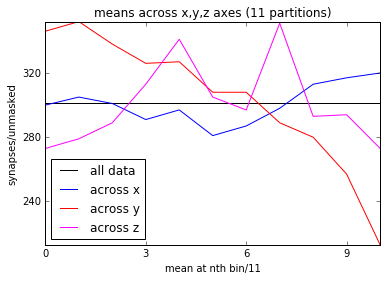

In [106]:
allmean = [301] * 11
means = np.vstack((allmean,meansxyz.T))
fig,ax = plt.subplots()
ax.set_title('means across x,y,z axes (11 partitions)')
ax.set_xticks(np.arange(0,11,3))
ax.set_yticks(np.arange(200,380,40))
ax.set_xlabel('mean at nth bin/11')
ax.set_ylabel('synapses/unmasked')
ax.plot(means[0,:],label='all data',color='black')
ax.plot(means[1,:],label='across x',color='blue')
ax.plot(means[2,:],label='across y',color='red')
ax.plot(means[3,:],label='across z',color='magenta')
legend = ax.legend(loc='lower left')

#### 5)Redo clustering: Redoing clustering multiple times on a few layers

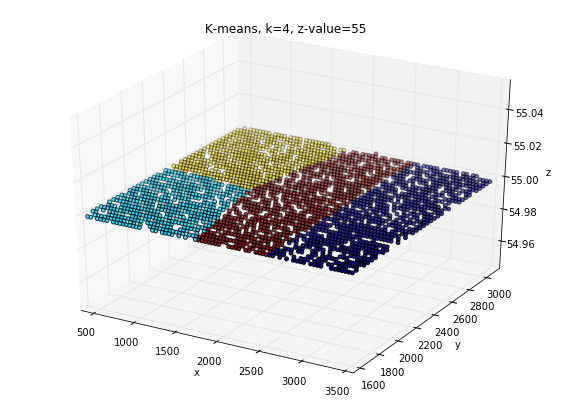

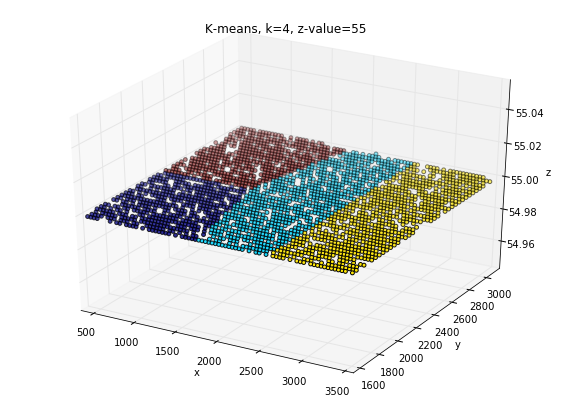

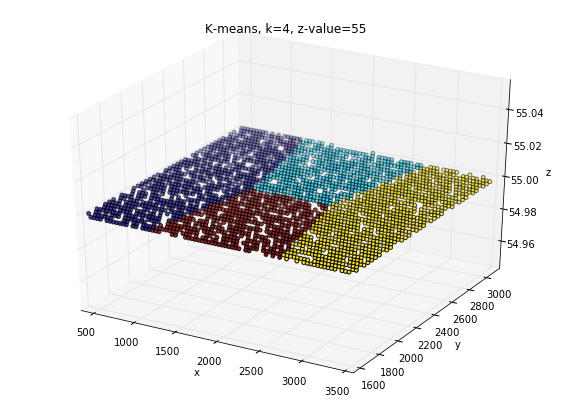

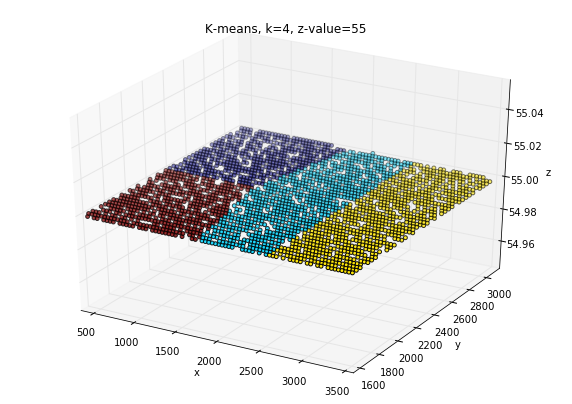

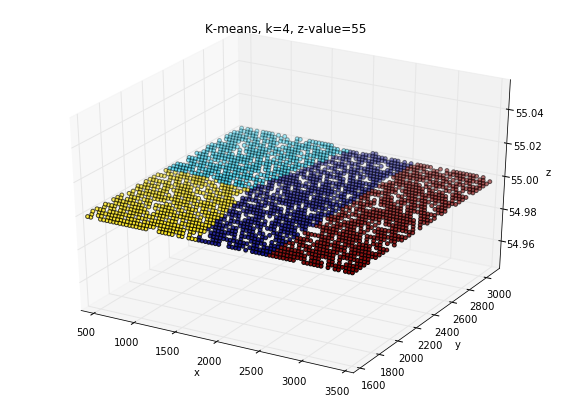

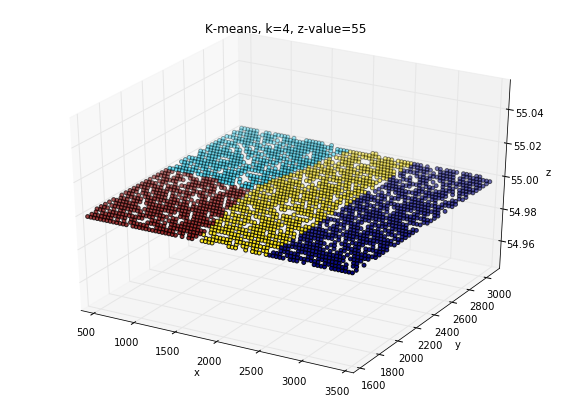

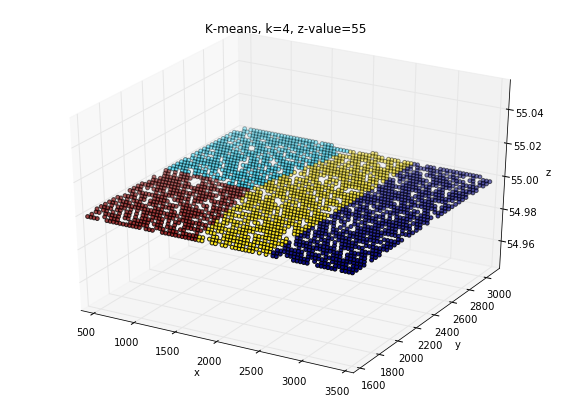

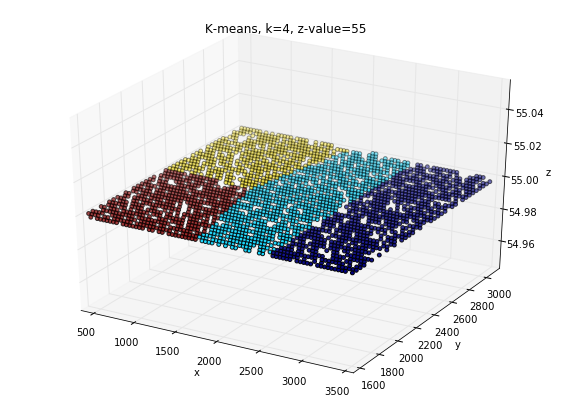

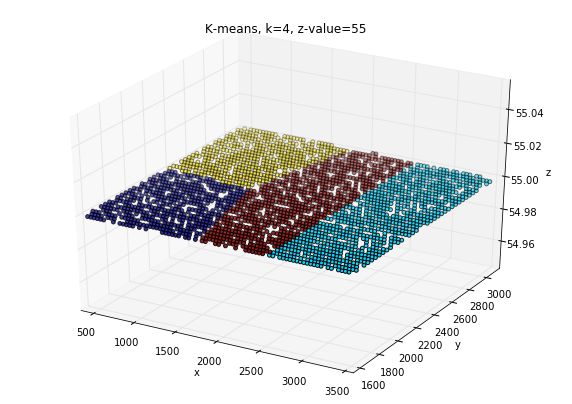

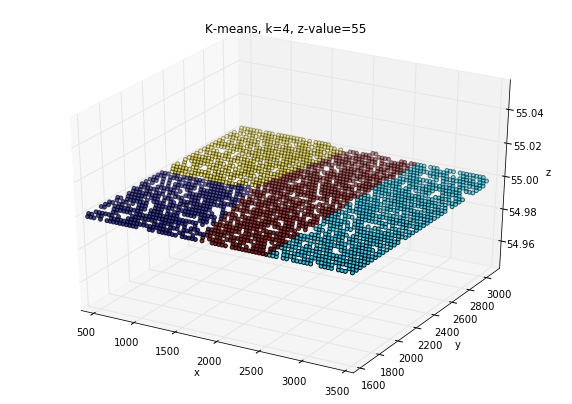

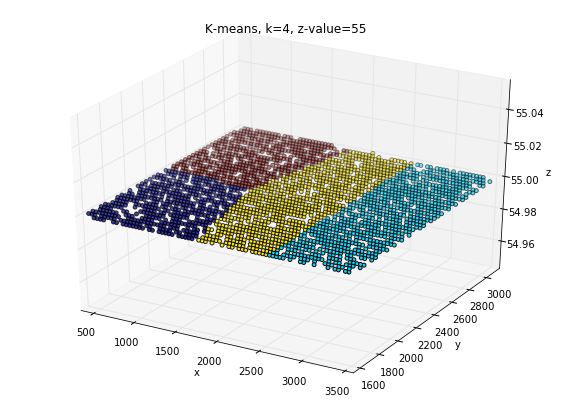

In [31]:
z_layer = [0] * 3
i = 0
import sklearn.cluster as cluster
d = np.unique(cleaned[:,2])
#same z
for i in range(0,11):
    d[i] = d[0]

#print d.shape
for d in d:
    zval = int((d + 56)/111)
    yind = (zval%4) - 1
    xind = np.floor_divide(zval,4)
    
    z_layer = cleaned[cleaned[:,2] == d]
    xyz_only = z_layer[:,[0,1,2]]
    #print xyz_only.shape
    def graph_cluster(xyz_only, clusters, centers, k):
        # randomly sample
        samples = 2500
        perm = np.random.permutation(xrange(1, len(xyz_only[:])))
        xyz_only = xyz_only[perm[:samples]]
        clusters = clusters[perm[:samples]]

        # get range for graphing
        mins = [np.amin(xyz_only[:, i]) for i in xrange(3)]
        maxs = [np.amax(xyz_only[:, i]) for i in xrange(3)]

        # following code adopted from
        # https://www.getdatajoy.com/examples/python-plots/3d-scatter-plot
        fig = plt.figure(figsize=(10, 7))
        ax = fig.gca(projection='3d')

        ax.set_title('K-means, k='+str(k) + ', z-value=' + str(int(d)))
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.set_xlim(mins[0], maxs[0])
        ax.set_ylim(mins[1], maxs[1])
        ax.set_zlim(mins[2], maxs[2])

        ax.view_init()
        ax.dist = 10  # distance

        ax.scatter(
                   xyz_only[:, 0], xyz_only[:, 1], xyz_only[:, 2],  # data
                   c=clusters,  # marker colour
                   marker='o',  # marker shape
                   s=15  # marker size
        )

        plt.show()
    n_clusters = 4
    kmeans_algo = cluster.KMeans(n_clusters=n_clusters)
    clusters = kmeans_algo.fit_predict(xyz_only)
    centers = kmeans_algo.cluster_centers_
    #print centers
    graph_cluster(xyz_only, clusters, centers, n_clusters)